*Aveen Hussein*

# Step1: Importing data
 The dataset consists of mobile features and we aim to estimate a mobile price depending on them.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# Reading our csv data
combine_data= pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')
print (combine_data.head(5))
# null value
print (combine_data.isnull().sum())

print (combine_data.isnull().sum())
# max min mean for each col.....
print(combine_data.describe())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


now we can take note that the number of null values was 0 for every feature in this dataset but it doesn't mean that there doesn't exist any missing data which is just represented differently and that is what we will investigate in the Missing data section



# Step2: Basic cleaning

In [65]:
from sklearn.feature_extraction import DictVectorizer
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

In [66]:
combine_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

We see that all the data is int64 except for m_dep and m_cores, which is good as we can see that there are no mixed letters and number values so "" was not used to represent nan values for instance

**handeling data types**

Id3 algorithm works best with numeric data, and luckily in our case all the data is already numeric. 
**a brief on how splits are made for numeric data according to the internet**

Every split in a decision tree is based on a feature. If the feature is categorical, the split is done with the elements belonging to a particular class. If the feature is contiuous, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. This will be done according to an impurity measure with the splitted branches. And the fact that the variable used to do split is categorical or continuous is irrelevant (in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).
src: https://datascience.stackexchange.com/questions/32622/how-to-make-a-decision-tree-with-both-continuous-and-categorical-variables-in-th

#Step3: Missing data

Now we will try to find out if there's any data with zero values that indicate missing data (for instance a mobile with 0 for battary power is likely a case of missing data same goes for multiple columns such as sc_h and sc_w and n_cores and so on)

In [67]:
len(combine_data.loc[(combine_data['battery_power']==0) | (combine_data['clock_speed']==0)|(combine_data['int_memory']==0)|
                    (combine_data['m_dep']==0)|(combine_data['mobile_wt']==0)|(combine_data['px_height']==0)|
                    (combine_data['px_height']==0)|(combine_data['px_width']==0)|(combine_data['ram']==0)|
                    ( combine_data['sc_h']==0)|(combine_data['sc_w']==0)|(combine_data['talk_time']==0)])

181

In [68]:
len(combine_data)

2000

so 181 out of 2000 fields has what we can assume is missing values

Now we will remove the rows that do have missing data 

In [69]:
combine_data_no_0=combine_data.loc[(combine_data['battery_power']!=0) & (combine_data['clock_speed']!=0)&(combine_data['int_memory']!=0)&
                    (combine_data['m_dep']!=0)&(combine_data['mobile_wt']!=0)&(combine_data['px_height']!=0)&
                    (combine_data['px_height']!=0)&(combine_data['px_width']!=0)&(combine_data['ram']!=0)&
                    ( combine_data['sc_h']!=0)&(combine_data['sc_w']!=0)&(combine_data['talk_time']!=0)]

In [70]:
len(combine_data_no_0)

1819

In [71]:
imputer = SimpleImputer(missing_values=0,
                        strategy='mean')


In [72]:
data_to_impute=combine_data[['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time']]

In [73]:
imputer = imputer.fit(data_to_impute)

data = imputer.transform(data_to_impute)

print("Imputed Data : \n", data)

Imputed Data : 
 [[8.420e+02 2.200e+00 7.000e+00 ... 9.000e+00 7.000e+00 1.900e+01]
 [1.021e+03 5.000e-01 5.300e+01 ... 1.700e+01 3.000e+00 7.000e+00]
 [5.630e+02 5.000e-01 4.100e+01 ... 1.100e+01 2.000e+00 9.000e+00]
 ...
 [1.911e+03 9.000e-01 3.600e+01 ... 9.000e+00 1.000e+00 5.000e+00]
 [1.512e+03 9.000e-01 4.600e+01 ... 1.800e+01 1.000e+01 1.900e+01]
 [5.100e+02 2.000e+00 4.500e+01 ... 1.900e+01 4.000e+00 2.000e+00]]


In [74]:
imputed=pd.DataFrame(data=data, columns=['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time'])

In [75]:
imputed.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,0.501750,140.249000,645.753754,1251.515500,2124.213000,12.306500,6.337363,11.011000
std,439.418206,0.816004,18.145715,0.288416,35.399655,443.310973,432.199447,1084.732044,4.213245,3.960716,5.463955
min,501.000000,0.500000,2.000000,0.100000,80.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000
25%,851.750000,0.700000,16.000000,0.200000,109.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000
50%,1226.000000,1.500000,32.000000,0.500000,141.000000,568.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000
75%,1615.250000,2.200000,48.000000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,64.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [76]:
data_to_keep=combine_data.drop(['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time'],axis=1)

In [77]:
All_data=pd.concat([imputed,data_to_keep],axis=1)

In [78]:
All_data.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,...,blue,dual_sim,fc,four_g,n_cores,pc,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,0.501750,140.249000,645.753754,1251.515500,2124.213000,12.306500,6.337363,...,0.4950,0.509500,4.309500,0.521500,4.520500,9.916500,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.816004,18.145715,0.288416,35.399655,443.310973,432.199447,1084.732044,4.213245,3.960716,...,0.5001,0.500035,4.341444,0.499662,2.287837,6.064315,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.500000,2.000000,0.100000,80.000000,1.000000,500.000000,256.000000,5.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.700000,16.000000,0.200000,109.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,...,0.0000,0.000000,1.000000,0.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,1.500000,32.000000,0.500000,141.000000,568.000000,1247.000000,2146.500000,12.000000,6.000000,...,0.0000,1.000000,3.000000,1.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,2.200000,48.000000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,...,1.0000,1.000000,7.000000,1.000000,7.000000,15.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,3.000000,64.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,...,1.0000,1.000000,19.000000,1.000000,8.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [79]:
len(All_data.loc[(All_data['battery_power']==0) | (All_data['clock_speed']==0)|(All_data['int_memory']==0)|
                    (All_data['m_dep']==0)|(All_data['mobile_wt']==0)|(All_data['px_height']==0)|
                    (All_data['px_height']==0)|(All_data['px_width']==0)|(All_data['ram']==0)|
                    ( All_data['sc_h']==0)|(All_data['sc_w']==0)|(All_data['talk_time']==0)])

0

As we can see all the 0 values are successfully replaced with imputed values which are calculated using the mean of all the data in the same column

**as we can see there are no null values in the data, so there is no need to drop them**

# Step5: Data analysis

detecting outliers using IQR, model performance can be improved by handling noisy data.

In [80]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   indices=list(df.index[(df<lower)|(df>upper)])
   df = np.where(df > upper,
       df.mean(),
       np.where(
           
           df < lower,
           df.mean(),
           df
           )
       )
   print(indices)
   return df

In [81]:
columns =['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_height','px_width','ram','sc_h','sc_w','talk_time']
 
# Iterate over column names
for column in columns:
     
    All_data[column] = impute_outliers_IQR(All_data[column])

[]
[]
[]
[]
[]
[988, 1771]
[]
[]
[]
[]
[]
[]


In [82]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
   All_data.iloc[:,:-1],
    All_data.iloc[:,-1],
    test_size=0.2,
    random_state=0)
# #size for test and train
print(X_train.shape)

print(X_test.shape)

(1600, 20)
(400, 20)


as to be expected, the corrolation between ram and mobile price appears to be the highest, followed by battary_power

some features may have useful meanings to add to the model when combined with other features, and since we only have 21 features to begin with then creating combinations of features should be computationally feasible

In [83]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
  # Get feature names
  combos = list(combinations(list(df.columns), 2))
  colnames = list(df.columns) + ['_'.join(x) for x in combos]

  # Find interactions
  poly = PolynomialFeatures(interaction_only=True, include_bias=False)
  df = poly.fit_transform(df)
  df = pd.DataFrame(df)
  df.columns = colnames

  # Remove interaction terms with all 0 values            
  noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
  df = df.drop(df.columns[noint_indicies], axis=1)

  return df
X=All_data.iloc[:,:-1]
X = add_interactions(X)
print(X.head())

   battery_power  clock_speed  int_memory  m_dep  mobile_wt  px_height  \
0          842.0          2.2         7.0    0.6      188.0       20.0   
1         1021.0          0.5        53.0    0.7      136.0      905.0   
2          563.0          0.5        41.0    0.9      145.0     1263.0   
3          615.0          2.5        10.0    0.8      131.0     1216.0   
4         1821.0          1.2        44.0    0.6      141.0     1208.0   

   px_width     ram  sc_h  sc_w  ...  n_cores_pc  n_cores_three_g  \
0     756.0  2549.0   9.0   7.0  ...         4.0              0.0   
1    1988.0  2631.0  17.0   3.0  ...        18.0              3.0   
2    1716.0  2603.0  11.0   2.0  ...        30.0              5.0   
3    1786.0  2769.0  16.0   8.0  ...        54.0              6.0   
4    1212.0  1411.0   8.0   2.0  ...        28.0              2.0   

   n_cores_touch_screen  n_cores_wifi  pc_three_g  pc_touch_screen  pc_wifi  \
0                   0.0           2.0         0.0            

In [84]:
# split data
X_trainselected1, X_testselected1, y_train, y_test = train_test_split(
   X,
    All_data.iloc[:,-1],
    test_size=0.2,
    random_state=0)
# #size for test and train
print(X_trainselected1.shape)

print(X_testselected1.shape)

(1600, 210)
(400, 210)


# Step6: Feature selection

Now we prepare the data for training
firstly, by splitting it into training and testing sets

we will go for a simple method of selecting the k-best features

In [85]:
import sklearn.feature_selection
# Create and fit selector
selector = sklearn.feature_selection.SelectKBest( k=20)
selected_features=selector.fit(X_trainselected1, y_train)
# Get columns to keep and create new dataframe with those only
cols_indices = selected_features.get_support(indices=True)

cols_selected=[X.columns[i] for i in cols_indices]
X_trainselected=X_trainselected1[cols_selected]
X_testselected=X_testselected1[cols_selected]


In [86]:
print(cols_selected)

['ram', 'battery_power_ram', 'clock_speed_ram', 'int_memory_ram', 'm_dep_ram', 'mobile_wt_ram', 'px_height_ram', 'px_width_ram', 'ram_sc_h', 'ram_sc_w', 'ram_talk_time', 'ram_blue', 'ram_dual_sim', 'ram_fc', 'ram_four_g', 'ram_n_cores', 'ram_pc', 'ram_three_g', 'ram_touch_screen', 'ram_wifi']


# Training

In [87]:
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=10)

*unprocessed data*

In [88]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [89]:
prediction=knn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


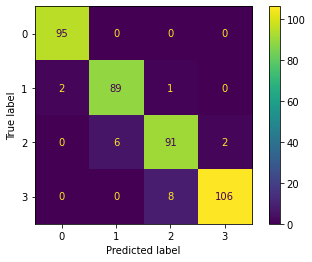

In [90]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

plot_confusion_matrix(knn,X_test,y_test)

In [91]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,prediction, average='weighted')
print(f1score)

0.9524754690318494


*processed data*

In [92]:

knn1 = KNeighborsClassifier(n_neighbors=10)

In [93]:
knn1.fit(X_trainselected, y_train)


KNeighborsClassifier(n_neighbors=10)

In [94]:
prediction1=knn1.predict(X_testselected)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


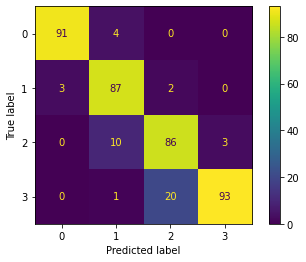

In [95]:
plot_confusion_matrix(knn1,X_testselected,y_test)

In [96]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,prediction1, average='weighted')
print(f1score)

0.8930731088391329


# Optimizing Values for Knn and nb using gridsearchCV

In [97]:

from sklearn.model_selection import GridSearchCV
# defining parameter range
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [98]:
print(grid.best_params_)


{'n_neighbors': 11}


0.9498480484087124


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


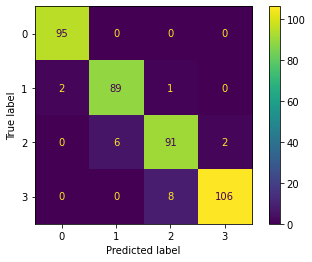

In [99]:
knn1 = KNeighborsClassifier(n_neighbors=11)
knn1.fit(X_train, y_train)
prediction1=knn1.predict(X_test)
plot_confusion_matrix(knn,X_test,y_test)
f1score=f1_score(y_test,prediction1, average='weighted')
print(f1score)

# Optimizing Values for Knn and nb using gridsearchCV for processed data

In [100]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid.fit(X_trainselected, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [101]:
print(grid.best_params_)


{'n_neighbors': 19}


0.889963888952629


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


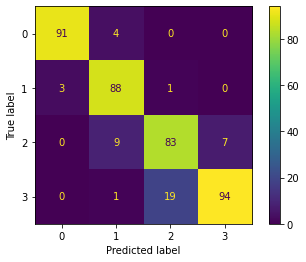

In [102]:
knn3 = KNeighborsClassifier(n_neighbors=19)
knn3.fit(X_trainselected, y_train)
prediction1=knn3.predict(X_testselected)
plot_confusion_matrix(knn3,X_testselected,y_test)
f1score=f1_score(y_test,prediction1, average='weighted')
print(f1score)

# Discussion of the results

The tuning suggests that the number k=11 is the best hyperparameter for this algorithm
The confusion matrix shows that the error values are only located on both sides of the accuracy line ( range 2 is confused with 1 or 3 but not 0) which indicates that this error stems from the data itself, only nearby ranges are confused with eachother because they are likely to have similar feature values.

# Implementing Naive bayes

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.5063302133302133


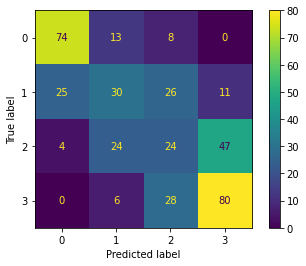

In [103]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
plot_confusion_matrix(NB,X_test,y_test)
f1score=f1_score(y_test,y_pred, average='weighted')
print(f1score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.263301505812385


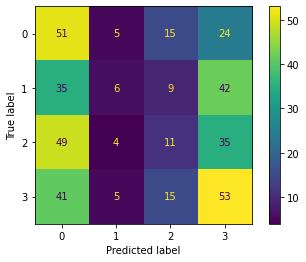

In [104]:
NB.fit(X_trainselected, y_train)
y_pred1 = NB.predict(X_testselected)
plot_confusion_matrix(NB,X_testselected,y_test)
f1score=f1_score(y_test,y_pred1, average='weighted')
print(f1score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.5494862194257356


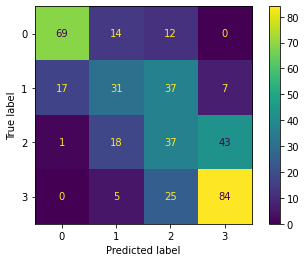

In [105]:
NB.fit(X_trainselected1, y_train)
y_pred1 = NB.predict(X_testselected1)
plot_confusion_matrix(NB,X_testselected1,y_test)
f1score=f1_score(y_test,y_pred1, average='weighted')
print(f1score)

Discussion, the model have shown the worst results by far using the naive bayes classifier.Tje reason being: Because it's Naive it assumes the features are independent, the probabilities are incorrect if this assumption is not correct. as we have noted with other models, for our dataset features influences on price range are not mutually independant.